<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/MCSO/notebooks/16_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importo las librerías necesarias**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
train_set.train_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_set.train_labels.bincount()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
sample = next(iter(train_set))

In [ ]:
print('len:', len(sample))

len: 2


In [ ]:
sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
       

In [ ]:
type(sample)

tuple

In [ ]:
image,label = sample

In [ ]:
print('types:', type(image), type(label))

types: <class 'torch.Tensor'> <class 'int'>


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

9

In [ ]:
print('squeezed:', image.squeeze().shape)

squeezed: torch.Size([28, 28])


label: 9


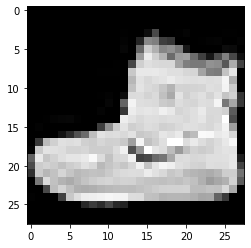

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
print('label:', label)

In [ ]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [ ]:
batch = next(iter(display_loader))

In [ ]:
print('len:', len(batch))

len: 2


In [ ]:
images, labels = batch

In [ ]:
print('types:', type(images), type(labels))

types: <class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
print('shapes:', images.shape, labels.shape)

shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


In [ ]:
images[0].shape

torch.Size([1, 28, 28])

In [ ]:
labels[0]

tensor(9)

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)

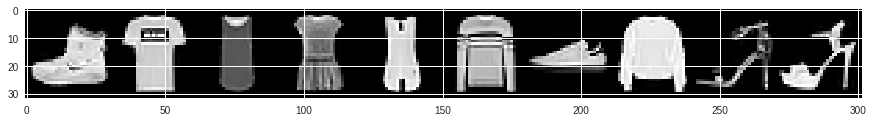

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [ ]:
print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


In [ ]:
class Lizard: #class declaration
    def __init__(self, name): #class constructor (code)
        self.name = name #attribute (data)
    
    def set_name(self, name): #method declaration (code)
        self.name = name #method implementation (code

In [ ]:
lizard = Lizard('deep')

In [ ]:
print(lizard.name)

deep


In [ ]:
lizard.set_name('lizard')

In [ ]:
print(lizard.name)

lizard


In [ ]:
class Network:
    def __init__(self):
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

# **Construyo el modelos con poco código**

In [ ]:
import torch.nn as nn

In [ ]:
class Network(nn.Module): # line 1
    def __init__(self):
        super(Network, self).__init__() # line 3
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        return t